In [1]:
from envs import REGISTRY as env_REGISTRY
from functools import partial
from components.episode_buffer import EpisodeBatch
import numpy as np
from sampler import Sampler

task = Sampler(1).sample_tasks()[0]
episode_limit = task['max_episode_steps']
env="gymma_meta" 
env_args={'key': 'gym_mdde:Mdde-v0', 'task': {'max_episode_steps': 200, 'Ri': 120000 }, 'pretrained_wrapper': None, 'state_last_action': False, 'seed': 63081851 }
env = env_REGISTRY[env](**env_args)
env.reset()

TypeError: 'NoneType' object cannot be interpreted as an integer

In [2]:
task

{'max_episode_steps': 100, 'Ri': 75500}

In [2]:
env.get_env_info()

{'state_shape': 8,
 'obs_shape': 2,
 'n_actions': 4,
 'n_agents': 4,
 'episode_limit': 200}

In [3]:
task=Sampler(1).sample_tasks()
env.set_task(task[0])
env.get_env_info()

{'state_shape': 6,
 'obs_shape': 2,
 'n_actions': 4,
 'n_agents': 3,
 'episode_limit': 149}

In [35]:
from sampler import Sampler
Sampler(10).sample_tasks()

[{'max_episode_steps': 350, 'Ri': 150000},
 {'max_episode_steps': 345, 'Ri': 148500},
 {'max_episode_steps': 340, 'Ri': 147000},
 {'max_episode_steps': 335, 'Ri': 145500},
 {'max_episode_steps': 330, 'Ri': 144000},
 {'max_episode_steps': 325, 'Ri': 142500},
 {'max_episode_steps': 320, 'Ri': 141000},
 {'max_episode_steps': 315, 'Ri': 139500},
 {'max_episode_steps': 310, 'Ri': 138000},
 {'max_episode_steps': 305, 'Ri': 136500},
 {'max_episode_steps': 300, 'Ri': 135000},
 {'max_episode_steps': 295, 'Ri': 133500},
 {'max_episode_steps': 290, 'Ri': 132000},
 {'max_episode_steps': 285, 'Ri': 130500},
 {'max_episode_steps': 280, 'Ri': 129000},
 {'max_episode_steps': 275, 'Ri': 127500},
 {'max_episode_steps': 270, 'Ri': 126000},
 {'max_episode_steps': 265, 'Ri': 124500},
 {'max_episode_steps': 260, 'Ri': 123000},
 {'max_episode_steps': 255, 'Ri': 121500},
 {'max_episode_steps': 250, 'Ri': 120000},
 {'max_episode_steps': 245, 'Ri': 118500},
 {'max_episode_steps': 240, 'Ri': 117000},
 {'max_epis

In [33]:
len([i for i in range(150000,75500,-1500)])

50

In [4]:
import gym
import gym_mdde
env=gym.make('Mdde-v0')
episodes = 2
for episode in range(1, episodes+1):
    obs = env.reset()
    print('At reset :', obs)
    # env.rendered()
    done=False
    while not done:
      action = env.action_space.sample()
      obs, rewards, dones, infos = env.step(action)
      # print(env.a)
      print(rewards)
      # print(dones)
      done=all(dones[agent] is True for agent in range(3))
    # env.rendered()


At reset : (array([20,  0]), array([18,  0]), array([19,  0]), array([49,  0]))
[inf, -1.6, -1.6, -1.6]
[-3.1978666666666666, -3.2, -3.2, -3.2]
[-3.2, -3.2, -3.2, -3.2]
[-3.2, -3.2, -3.2, -3.2]
[inf, -3.2, -3.2, -3.2]
[-3.1978666666666666, inf, inf, -3.2]
[-3.2, inf, inf, -3.2]
[-3.2, inf, inf, -3.2]
[-3.2, nan, -3.1978666666666666, inf]
[-3.2, inf, -3.2, -3.1978666666666666]
[-3.2, -3.1978666666666666, -3.2, -3.2]
[-3.2, -3.2, nan, -3.2]
[inf, inf, nan, -3.2]
[-3.1957333333333335, inf, inf, -3.2]
[inf, -3.1957333333333335, -3.1978666666666666, -3.2]
[-3.1978666666666666, inf, inf, -3.2]
[-3.2, -3.1957333333333335, -3.1957333333333335, -3.2]
[-3.2, inf, inf, -3.2]
[inf, inf, -3.1957333333333335, -3.2]
[inf, -3.1957333333333335, -3.2, -3.2]
[inf, inf, -3.2, -3.2]
[inf, inf, inf, -3.2]
[inf, -3.1978666666666666, -3.1957333333333335, -3.2]
[inf, -3.2, inf, -3.2]
[-3.1978666666666666, inf, -3.1978666666666666, -3.2]
[inf, -3.1978666666666666, -3.2, -3.2]
[-3.1978666666666666, -3.2, inf, -3

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
env.a

In [39]:
import matplotlib.pyplot as plt
# Opening JSON file
import json
f1 = open('../results1/sacred/mappo/MDDE_Discret-v0/1/metrics.json')
mappo_data = json.load(f1)

f2 = open('../results1/sacred/maa2c/MDDE_Discret-v0/1/metrics.json')
maa2c_data = json.load(f2)


f3 = open('../results/sacred/mappo_meta/gym_mdde:Mdde-v0/2/metrics.json')
meta_mappo_data = json.load(f3)


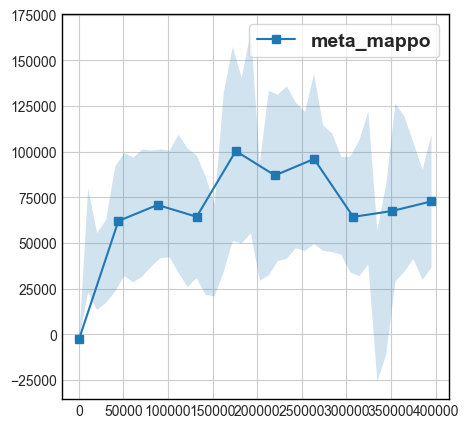

In [42]:
# returns JSON object as
# a dictionary
import numpy as np
from cProfile import label
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'})
fig, ax = plt.subplots(figsize=(5, 5))
from scipy.interpolate import make_interp_spline
x1=np.array(mappo_data['return_mean']['steps'])
x2=np.array(maa2c_data['return_mean']['steps'])
x3=np.array(meta_mappo_data['return_mean']['steps'])

y1=np.array(mappo_data['return_mean']['values'])
y2=np.array(maa2c_data['return_mean']['values'])
y3=np.array(meta_mappo_data['return_mean']['values'])

# X_Y_Spline1 = make_interp_spline(x1, y1)
# X_1 = np.linspace(x1.min(), x1.max(), 20)
# Y_1 = X_Y_Spline1(X_1)

# X_Y_Spline2 = make_interp_spline(x2, y2)
# X_2 = np.linspace(x2.min(), x2.max(), 20)
# Y_2 = X_Y_Spline2(X_2)

X_Y_Spline3 = make_interp_spline(x3, y3)
X_3 = np.linspace(x3.min(), x3.max(), 10)
Y_3 = X_Y_Spline3(X_3)

# ax.plot(X_1, Y_1,'-s',label='mappo')
# ax.plot(X_2,Y_2,'-s',label='maa2c')
ax.plot(X_3,Y_3,'-s',label='meta_mappo')

# ax.plot(maddpg_data['return_mean']['steps'], maddpg_data['return_mean']['values'],label='maddpg')
# ax.plot(mappo_data['return_mean']['steps'], mappo_data['return_mean']['values'],label='mappo')
# ax.plot(maa2c_data['return_mean']['steps'], maa2c_data['return_mean']['values'],label='maa2c')
# ax.fill_between(np.array(maddpg_data['return_mean']['steps']), np.array(maddpg_data['return_mean']['values']) - np.array(maddpg_data['return_std']['values']), np.array(maddpg_data['return_mean']['values']) + np.array(maddpg_data['return_std']['values']), alpha=0.2)
# ax.fill_between(np.array(mappo_data['return_mean']['steps']), np.array(mappo_data['return_mean']['values']) - np.array(mappo_data['return_std']['values']), np.array(mappo_data['return_mean']['values']) + np.array(mappo_data['return_std']['values']), alpha=0.2,interpolate=True)
# ax.fill_between(np.array(maa2c_data['return_mean']['steps']), np.array(maa2c_data['return_mean']['values']) - np.array(maa2c_data['return_std']['values']), np.array(maa2c_data['return_mean']['values']) + np.array(maa2c_data['return_std']['values']), alpha=0.2,interpolate=True)
ax.fill_between(np.array(meta_mappo_data['return_mean']['steps']), np.array(meta_mappo_data['return_mean']['values']) - np.array(meta_mappo_data['return_std']['values']), np.array(meta_mappo_data['return_mean']['values']) + np.array(meta_mappo_data['return_std']['values']), alpha=0.2,interpolate=True)
plt.legend(
    frameon=True, fancybox=True, \
    prop={'weight':'bold', 'size':14}, loc="best")
# # plt_1 = plt.figure(dpi=200)
# plt.plot(maddpg_data['return_mean']['steps'], maddpg_data['return_mean']['values'],label='maddpg')
# plt.plot(mappo_data['return_mean']['steps'], mappo_data['return_mean']['values'],label='mappo')
# plt.plot(maa2c_data['return_mean']['steps'], maa2c_data['return_mean']['values'],label='maa2c')
